# Evaluation of `ProfilePV`

In [3]:
%cd ..

/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/DT-rse


In [30]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from rich.pretty import pprint

from ernesto.postprocessing.visualization import ernesto_plotter
from ernesto.postprocessing.metrics import compute_metrics, _pointwise_mse

In [31]:
folder = "data/output/driven"
folder = folder + '/revisione_JES/analisi_temp/'
path = Path(folder)

In [32]:
grounds = [f for f in os.listdir(path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(path / f) for f in sorted(grounds)), ignore_index=True)

In [33]:
df_sim_dict = {}
sim_datasets = [f for f in os.listdir(path) if not f.startswith('ground')]

if '.DS_Store' in sim_datasets:
    sim_datasets.remove('.DS_Store')
if 'plots' in sim_datasets:
    sim_datasets.remove('plots')

for f in sim_datasets:
    df_sim_dict[f.split('.')[0]] = pd.read_csv(path / f)

In [34]:
df_sim_dict.keys()

dict_keys(['2rc_tamb30', '2rc_tamb10'])

In [35]:
vars_to_compare = ['voltage', 'temperature']
ground_dict = {}

for key, df_sim in df_sim_dict.items():
    sim_dict = {}
    print("{}: ".format(key))
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values
        #sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values
        sim_dict[var] = df_sim[var].values[1:]

    pprint(compute_metrics(ground=ground_dict, 
                           simulated=sim_dict, 
                           vars=vars_to_compare, 
                           metrics=['mse', 'mae', 'mape', 'max_abs_err'], 
                           steps=None)
          )

2rc_tamb30: 


{
│   'voltage': {
│   │   'mse': np.float64(0.0004877016750264096),
│   │   'mae': np.float64(0.01795648510600471),
│   │   'mape': np.float64(0.4849504528233108),
│   │   'max_abs_err': np.float64(0.048432105473717346)
│   },
│   'temperature': {
│   │   'mse': np.float64(72.63442132597025),
│   │   'mae': np.float64(8.520324671812393),
│   │   'mape': np.float64(2.891922284905314),
│   │   'max_abs_err': np.float64(9.063694548219246)
│   }
}

2rc_tamb10: 


{
│   'voltage': {
│   │   'mse': np.float64(0.0006457645581061062),
│   │   'mae': np.float64(0.02265079940856028),
│   │   'mape': np.float64(0.6087407341909954),
│   │   'max_abs_err': np.float64(0.05150105892332313)
│   },
│   'temperature': {
│   │   'mse': np.float64(131.7952311906273),
│   │   'mae': np.float64(11.478513812168947),
│   │   'mape': np.float64(3.8958769004228038),
│   │   'max_abs_err': np.float64(12.46398827036461)
│   }
}

In [36]:
comparison_params = {
    'dfs': [df_ground] + list(df_sim_dict.values()), 
    'variables': ['voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', '10°C', '30°C'],
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[V]', '[K]'],
    'markers': [''] * 5,
    'line_styles': ['-', '-', (0, (5, 5))],
    'save_fig': False,
    'sampling_rate': 1,
    'colors': ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_test',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
    'alphas':[1, 1, 1]
}

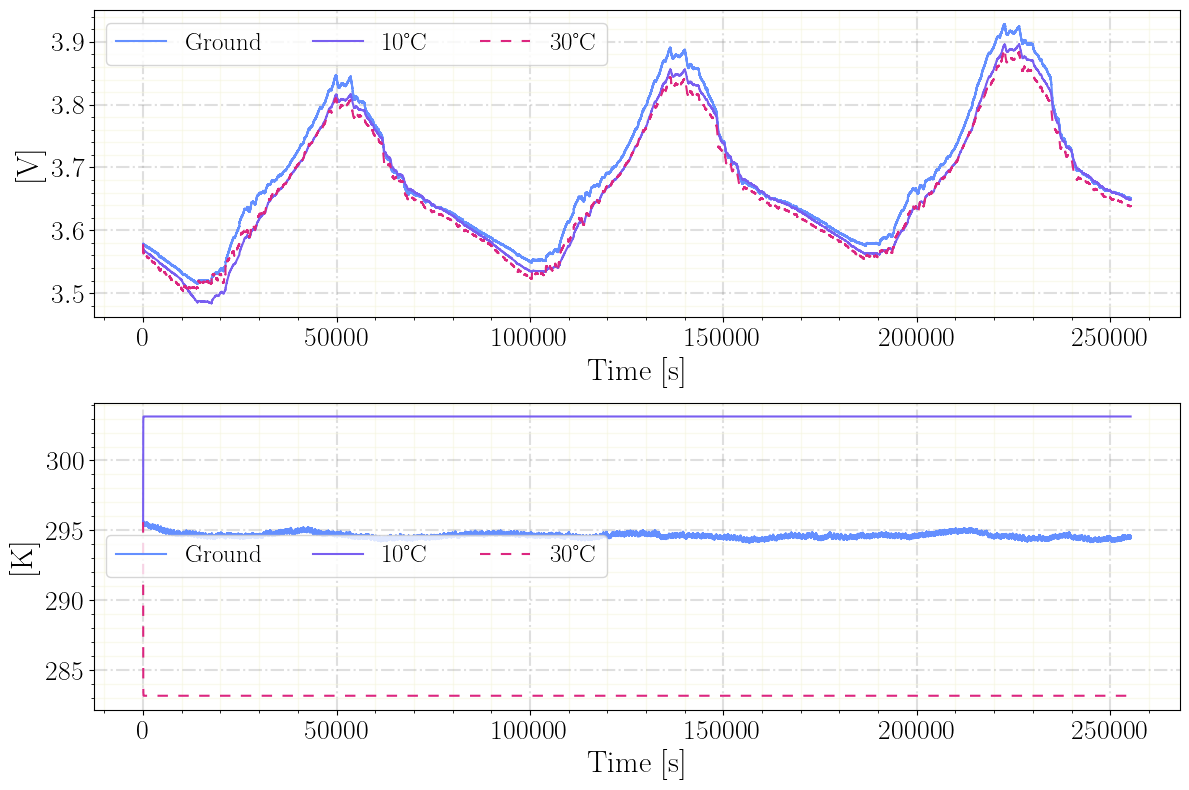

In [37]:
ernesto_plotter(**comparison_params)

In [38]:
single_param = {
    'dfs': [df_ground], 
    'variables': ['power'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': None,
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[W]'],
    'markers': [''] * 5,
    'line_styles': ['-'] * 5,
    'save_fig': False,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_profile',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (15, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
    'figsize': (12, 4)
}

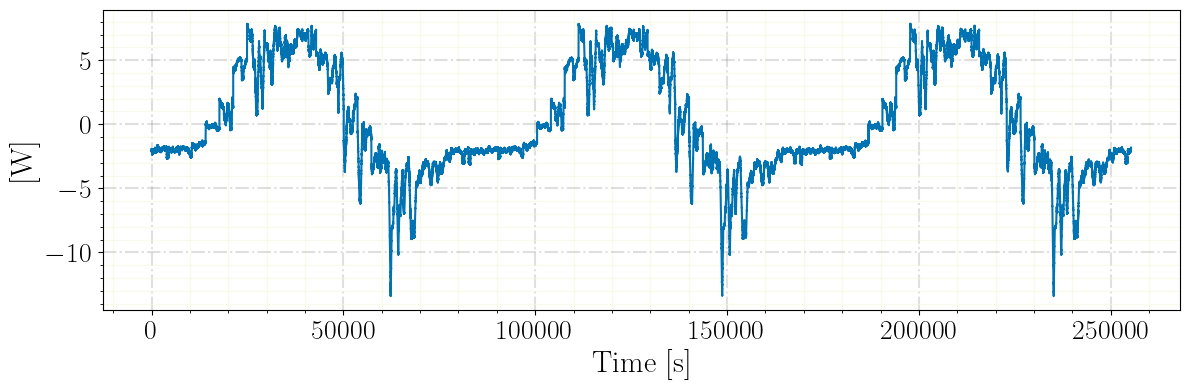

In [39]:
ernesto_plotter(**single_param)

# Evaluation of `Checkup` profile

In [42]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from rich.pretty import pprint

from ernesto.postprocessing.visualization import ernesto_plotter
from ernesto.postprocessing.metrics import compute_metrics, _mse

In [45]:
folder = "data/output/driven"
folder = folder + '/revisione_JES/analisi_soc/'
path = Path(folder)

In [46]:
grounds = [f for f in os.listdir(path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(path / f) for f in sorted(grounds)), ignore_index=True)

In [47]:
df_sim_dict = {}
sim_datasets = [f for f in os.listdir(path) if not f.startswith('ground')]

if '.DS_Store' in sim_datasets:
    sim_datasets.remove('.DS_Store')
if 'plots' in sim_datasets:
    sim_datasets.remove('plots')

for f in sim_datasets:
    df_sim_dict[f.split('.')[0]] = pd.read_csv(path / f)

In [48]:
df_sim_dict.keys()

dict_keys(['soc_05', 'soc_normale'])

In [49]:
vars_to_compare = ['voltage', 'temperature']
ground_dict = {}

for key, df_sim in df_sim_dict.items():
    sim_dict = {}
    print("{}: ".format(key))
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values
        #sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values
        sim_dict[var] = df_sim[var].values[1:]

    pprint(compute_metrics(ground=ground_dict, 
                           simulated=sim_dict, 
                           vars=vars_to_compare, 
                           metrics=None, steps=None)
          )

soc_05: 


{
│   'voltage': {
│   │   'mse': np.float64(0.011197414365991238),
│   │   'mae': np.float64(0.08916314199630052),
│   │   'mape': np.float64(2.4141929410206577),
│   │   'max_abs_err': np.float64(0.22235008773588127)
│   },
│   'temperature': {
│   │   'mse': np.float64(0.13792349499834194),
│   │   'mae': np.float64(0.3495463471019267),
│   │   'mape': np.float64(0.11861674631586365),
│   │   'max_abs_err': np.float64(0.7939701005893767)
│   }
}

soc_normale: 


{
│   'voltage': {
│   │   'mse': np.float64(0.0005294803872582407),
│   │   'mae': np.float64(0.019182183368762717),
│   │   'mape': np.float64(0.5162501535267625),
│   │   'max_abs_err': np.float64(0.045408997539956086)
│   },
│   'temperature': {
│   │   'mse': np.float64(0.1377869756548192),
│   │   'mae': np.float64(0.3495049171235896),
│   │   'mape': np.float64(0.11860275793138876),
│   │   'max_abs_err': np.float64(0.7943500432634778)
│   }
}

In [63]:
comparison_params = {
    'dfs': [df_ground] + list(df_sim_dict.values()), 
    'variables': ['voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', 'SOC_0.5', 'SOC_regular'],
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[V]', '[K]'],
    'markers': [''] * 5,
    'line_styles': ['-', '-', (0, (5, 5))],
    'save_fig': False,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_test',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (15, 4),
    'tick_font_size': 18,
    'label_font_size': 20,
    'legend_font_size': 18,
    'figsize': (15, 4),
    'alphas': [1, 1, 0.6]
}

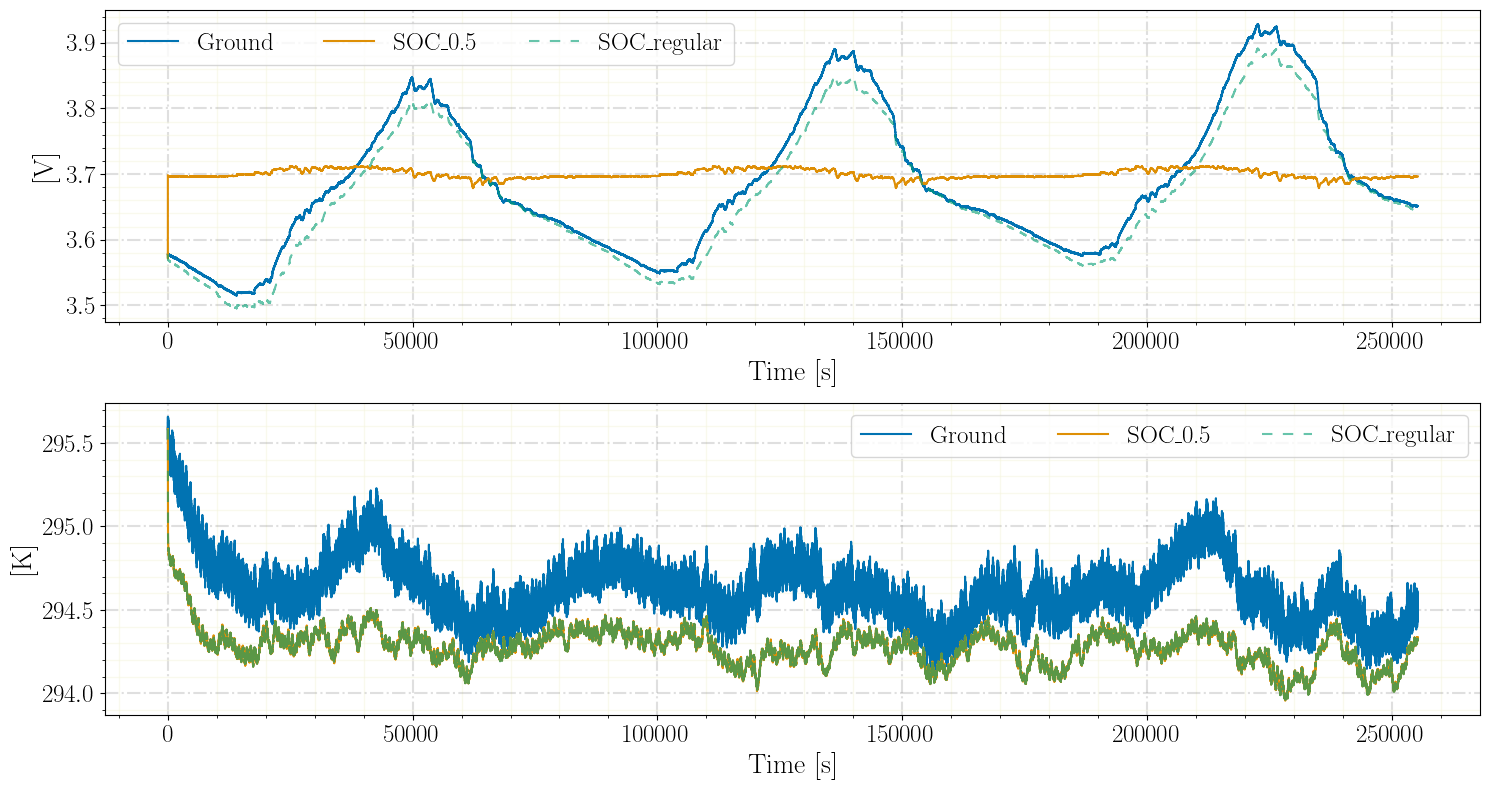

In [64]:
ernesto_plotter(**comparison_params)

In [151]:
single_param = {
    'dfs': [df_ground], 
    'variables': ['current'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': None,
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[A]'],
    'markers': [''] * 5,
    'line_styles': ['-'] * 5,
    'save_fig': False,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'scatter',
    'dest': path, 
    'fig_name': 'checkup_profile',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (15, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
    'figsize': (12, 4)
}

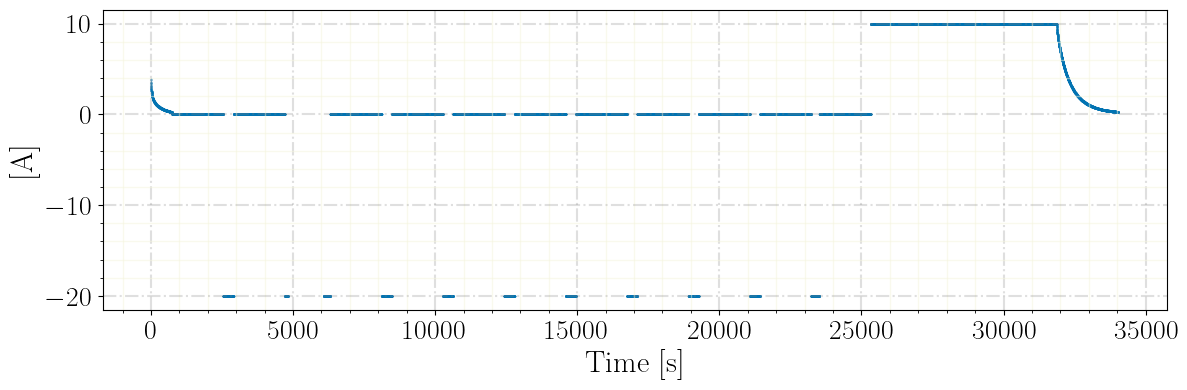

In [152]:
ernesto_plotter(**single_param)

# Evaluation of `SaltoTermico`

In [67]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from rich.pretty import pprint
import seaborn as sns

from ernesto.postprocessing.visualization import ernesto_plotter
from ernesto.postprocessing.metrics import compute_metrics, _mse

In [70]:
folder = "data/output/driven"
folder = folder + '/revisione_JES/analisi_soh/'
path = Path(folder)

In [71]:
grounds = [f for f in os.listdir(path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(path / f) for f in sorted(grounds)), ignore_index=True)

In [72]:
df_sim_dict = {}
sim_datasets = [f for f in os.listdir(path) if not f.startswith('ground')]

if '.DS_Store' in sim_datasets:
    sim_datasets.remove('.DS_Store')
if 'plots' in sim_datasets:
    sim_datasets.remove('plots')

for f in sim_datasets:
    df_sim_dict[f.split('.')[0]] = pd.read_csv(path / f)

In [73]:
df_sim_dict.keys()

dict_keys(['cu1', 'cu4'])

In [74]:
# vars_to_compare = ['voltage', 'temperature']
ground_dict = {}

for key, df_sim in df_sim_dict.items():
    sim_dict = {}
    print("{}: ".format(key))
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values[19500:]
        #sim_dict[var] = df_sim[df_sim['time'].isin(df_ground['time'].values)][var].values
        sim_dict[var] = df_sim[var].values[19501:]

    pprint(compute_metrics(ground=ground_dict, 
                           simulated=sim_dict, 
                           vars=vars_to_compare, 
                           metrics=None, 
                           steps=None)
          )

cu1: 


{
│   'voltage': {
│   │   'mse': np.float64(0.00025667603633106625),
│   │   'mae': np.float64(0.012844341871932102),
│   │   'mape': np.float64(0.34450303066007226),
│   │   'max_abs_err': np.float64(0.034468032038039276)
│   },
│   'temperature': {
│   │   'mse': np.float64(0.13033096131336894),
│   │   'mae': np.float64(0.33986790503878056),
│   │   'mape': np.float64(0.11534269586844384),
│   │   'max_abs_err': np.float64(0.7710149968683595)
│   }
}

cu4: 


{
│   'voltage': {
│   │   'mse': np.float64(0.001948874504971468),
│   │   'mae': np.float64(0.04228950040963339),
│   │   'mape': np.float64(1.1422098580752478),
│   │   'max_abs_err': np.float64(0.07132253191659244)
│   },
│   'temperature': {
│   │   'mse': np.float64(0.13031012254112312),
│   │   'mae': np.float64(0.33983830549574046),
│   │   'mape': np.float64(0.11533264979545264),
│   │   'max_abs_err': np.float64(0.7709771905707612)
│   }
}

In [75]:
colors = sns.color_palette('colorblind', 10)
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [76]:
temp_params = {
    'dfs': [df_ground],
    'variables': ['t_amb'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': None,
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[K]'],
    'markers': ['', '', ''] ,
    'line_styles': ['-', '-', '-'],
    'save_fig': False,
    'sampling_rate': 1,
    'colors': [colors[9]],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_thermal-jump-t_amb',
    'pic_format': 'pdf',
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
}

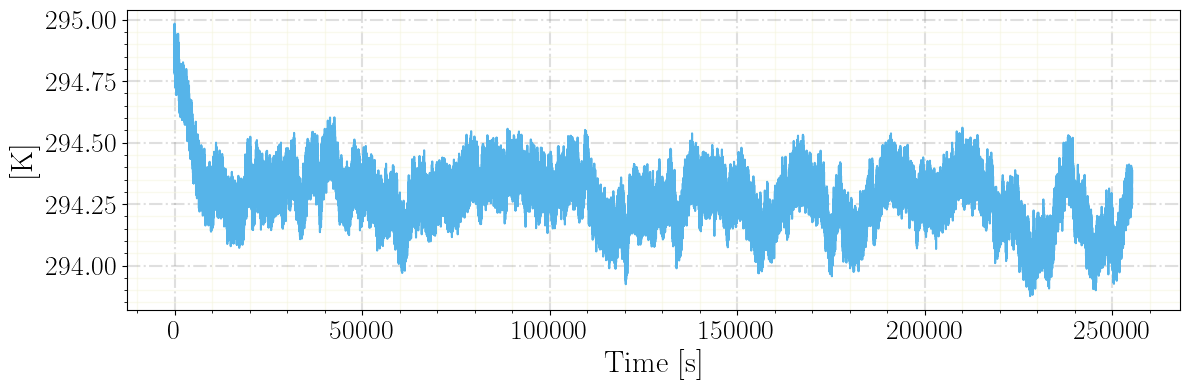

In [77]:
ernesto_plotter(**temp_params)

In [83]:
comparison_params = {
    'dfs': [df_ground] + list(df_sim_dict.values()), 
    'variables': ['voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', 'CU1', 'CU4'],
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[V]', '[K]'],
    'markers': [''] * 5,
    'line_styles': ['-', '-', (0, (5, 5))],
    'save_fig': False,
    'sampling_rate': 1,
    'colors': [colors[0], colors[1], colors[2]],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_test',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (15, 4),
    'tick_font_size': 18,
    'label_font_size': 20,
    'legend_font_size': 18,
    'figsize': (15, 4),
    'alphas': [1, 1, 0.6]
}

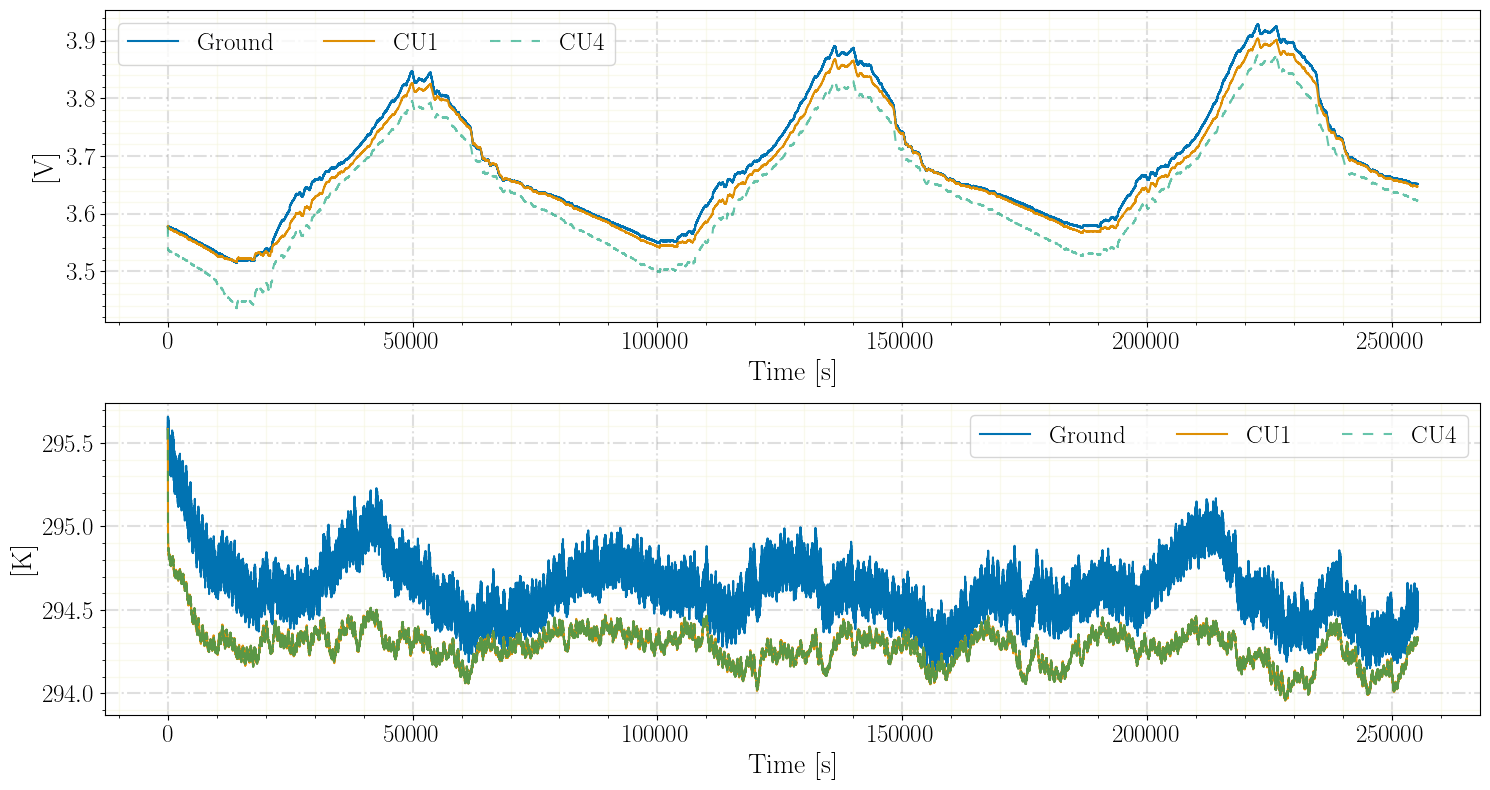

In [84]:
ernesto_plotter(**comparison_params)

In [125]:
comparison_params = {
    'dfs': [df_ground, df_sim_dict['2rc'], df_sim_dict['2rc-only_soc']],
    'variables': ['voltage'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', '2-RC', '2-RC w/o temp'],
    'x_labels': ['Time [s]'] * 5,
    'y_labels': ['[V]'],
    'markers': ['', '', ''] ,
    'line_styles': ['-', '-', '-'],
    'save_fig': False,
    'sampling_rate': 1,
    'colors': [colors[0], colors[2], colors[4]],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_thermal-jump-2rc',
    'pic_format': 'pdf',
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
}

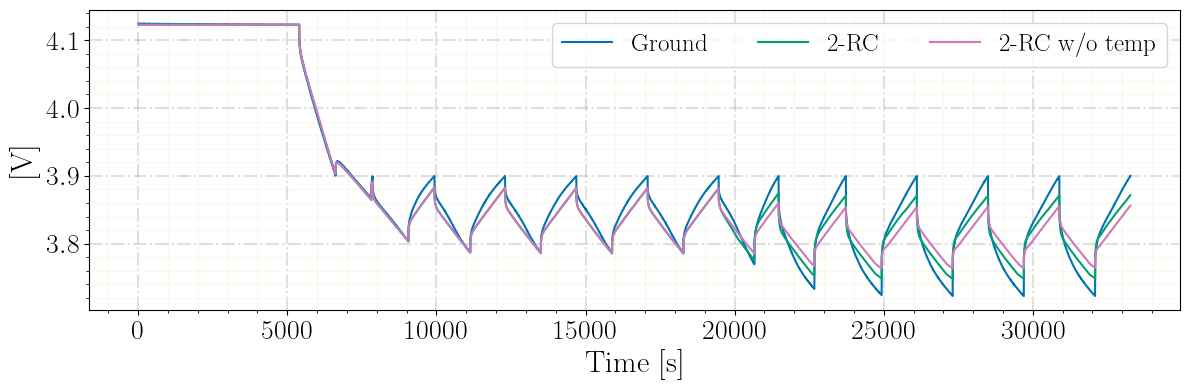

In [126]:
ernesto_plotter(**comparison_params)

# Evaluation of `TestFacility`

In [4]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from rich.pretty import pprint

from ernesto.postprocessing.visualization import ernesto_plotter
from ernesto.postprocessing.metrics import compute_metrics, _mse

In [5]:
folder = "data/output/driven"
folder = folder + '/esperimenti_revisione_JES/aging_lungo/2025_06_20-13_38_33'
path = Path(folder)

In [6]:
grounds = [f for f in os.listdir(path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(path / f) for f in sorted(grounds)), ignore_index=True)

In [7]:
df_sim_dict = {}
sim_datasets = [f for f in os.listdir(path) if not f.startswith('ground')]

sim_datasets.remove('.DS_Store') if '.DS_Store' in sim_datasets else None
sim_datasets.remove('plots') if 'plots' in sim_datasets else None

#for f in sim_datasets:
#    df_sim_dict[f.split('.')[0]] = pd.read_csv(path / f)

In [8]:
sorted(sim_datasets)
df_sim_dict['aging'] = pd.concat((pd.read_csv(path / f) for f in sorted(sim_datasets)), ignore_index=True)

In [9]:
df_sim_dict.keys()

dict_keys(['aging'])

In [10]:
vars_to_compare = ['voltage', 'temperature']
ground_dict = {}

half_len = len(df_ground)//2

for key, df_sim in df_sim_dict.items():
    sim_dict = {}
    print("{}: ".format(key))
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values
        #sim_dict[var] = df_sim[df_sim['time'].astype(int).isin(int_times)][var].values
        sim_dict[var] = df_sim[var].values[1:half_len +1]

    pprint(compute_metrics(ground=ground_dict, 
                           simulated=sim_dict, 
                           vars=vars_to_compare, 
                           metrics=None, steps=range(0,half_len))
          )

aging: 


{
│   'voltage': {
│   │   'mse': np.float64(0.00333686574432585),
│   │   'mae': np.float64(0.04065296005780111),
│   │   'mape': np.float64(1.1069100524851487),
│   │   'max_abs_err': np.float64(0.5140818873425772)
│   },
│   'temperature': {
│   │   'mse': np.float64(51.30974116785066),
│   │   'mae': np.float64(5.774941267001676),
│   │   'mape': np.float64(1.8331341994855503),
│   │   'max_abs_err': np.float64(22.588753117522458)
│   }
}

In [11]:
vars_to_compare = ['voltage', 'temperature']
ground_dict = {}

for key, df_sim in df_sim_dict.items():
    sim_dict = {}
    print("{}: ".format(key))
    
    for var in vars_to_compare:
        ground_dict[var] = df_ground[var].values
        #sim_dict[var] = df_sim[df_sim['time'].astype(int).isin(int_times)][var].values
        sim_dict[var] = df_sim[var].values[1:len(df_ground) +1]

    pprint(compute_metrics(ground=ground_dict, 
                           simulated=sim_dict, 
                           vars=vars_to_compare, 
                           metrics=None, steps=range(0, len(df_ground)))
          )

aging: 


{
│   'voltage': {
│   │   'mse': np.float64(0.006707219417259786),
│   │   'mae': np.float64(0.05222912737279669),
│   │   'mape': np.float64(1.4626839833019925),
│   │   'max_abs_err': np.float64(4.062720546679922)
│   },
│   'temperature': {
│   │   'mse': np.float64(37.44461270574282),
│   │   'mae': np.float64(4.7043022965453405),
│   │   'mape': np.float64(1.4908829746488046),
│   │   'max_abs_err': np.float64(27.11144993808807)
│   }
}

In [12]:
comparison_params = {
    'dfs': [df_ground[:1000000], df_sim[:1000000]], 
    'variables': ['voltage', 'temperature'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': ['Ground', '2-RC'],
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[V]', '[K]'],
    'markers': [''] * 5,
    'line_styles': ['-', '-', (0, (5, 5))],
    'save_fig': True,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'scatter',
    'dest': path, 
    'fig_name': 'test_facility',
    'pic_format': 'pdf',
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
}

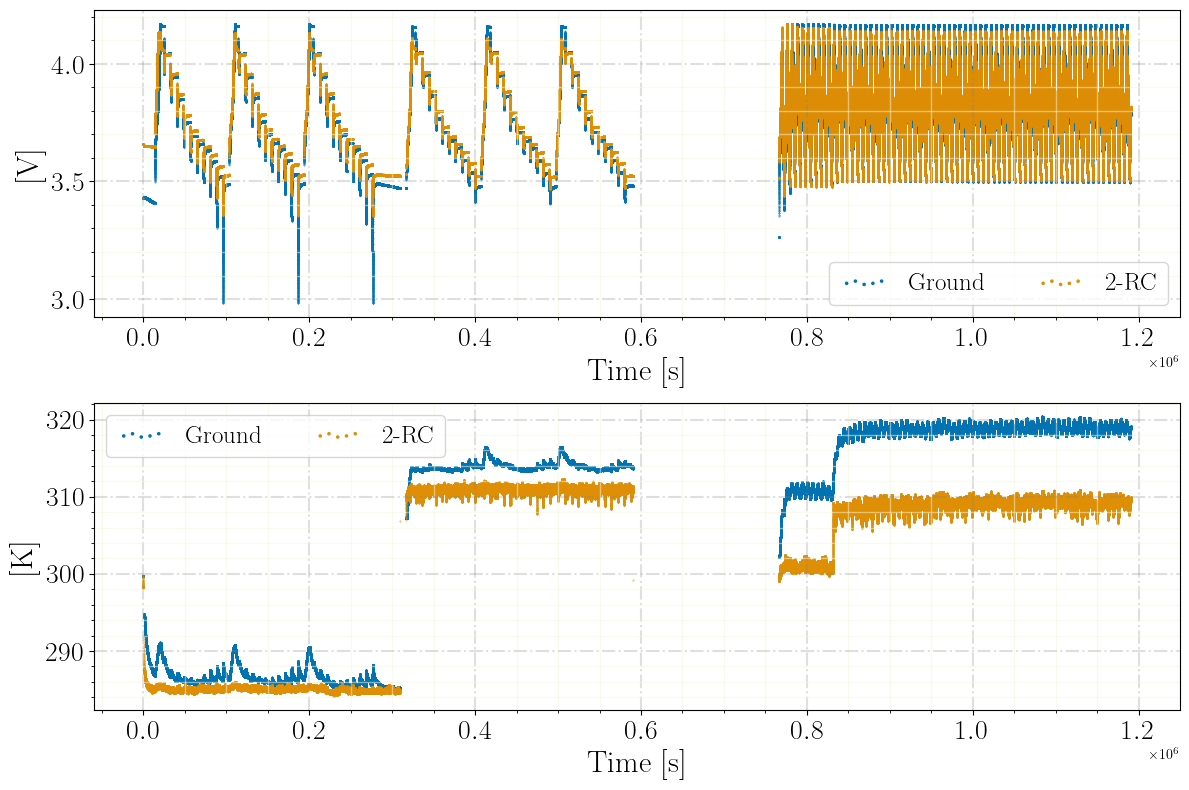

In [13]:
ernesto_plotter(**comparison_params)

In [14]:
single_param = {
    'dfs': [df_ground], 
    'variables': ['current'], 
    'x_axes': ['time', 'time', 'time'],
    'labels': None,
    'x_labels': ['Time [s]'] * 3,
    'y_labels': ['[A]'],
    'markers': [''] * 5,
    'line_styles': ['-'] * 5,
    'save_fig': True,
    'sampling_rate': 1,
    #'colors': ['cyan', 'violet'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'test_facility_profile',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
    'figsize': (12, 4)
}

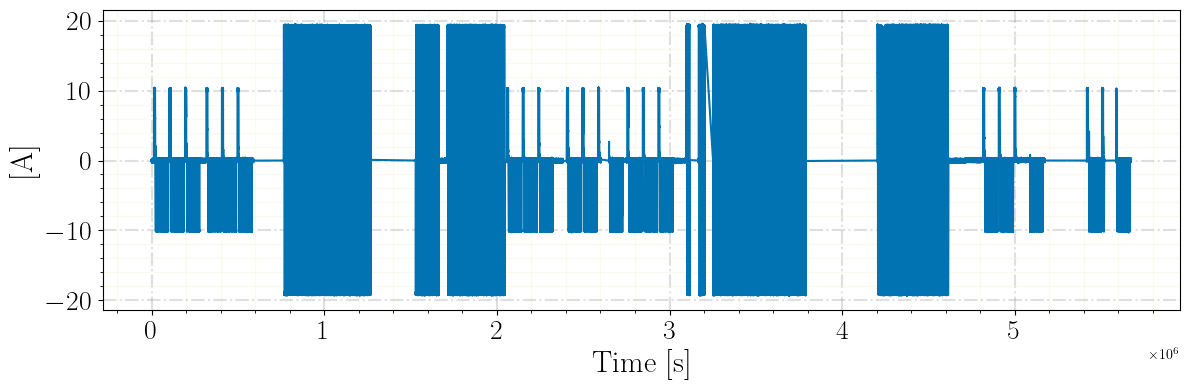

In [15]:
ernesto_plotter(**single_param)